In [1]:
from sklearn.datasets import fetch_california_housing #이미 있는 데이터셋 
import pandas as pd
import numpy as np

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

data = data[['MedInc', 'MedHouseVal']]

In [2]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [4]:
np.random.seed(42)
missing_rate = 0.1 #결측치 10%
n_ms_sample = int(np.floor(missing_rate*data.shape[0]))


missing_samples = np.random.choice(data.index, n_ms_sample, replace=False)
data_missing = data.copy()
data_missing.loc[missing_samples, 'MedInc' ] = np.nan

In [5]:
data_missing

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
...,...,...
20635,NaN,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


fillna(method = 'bfill')
fillna(method = 'ffill')
interpolate(method = ")

In [6]:
data_missing.loc[:10,]

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [7]:
data_missing.loc[:10,].fillna(method='bfill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,3.8462,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [8]:
data_missing.loc[:10,].fillna(method='ffill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,7.2574,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [9]:
data_missing.loc[:10,].interpolate()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.5518,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


<AxesSubplot:xlabel='MedInc', ylabel='Count'>

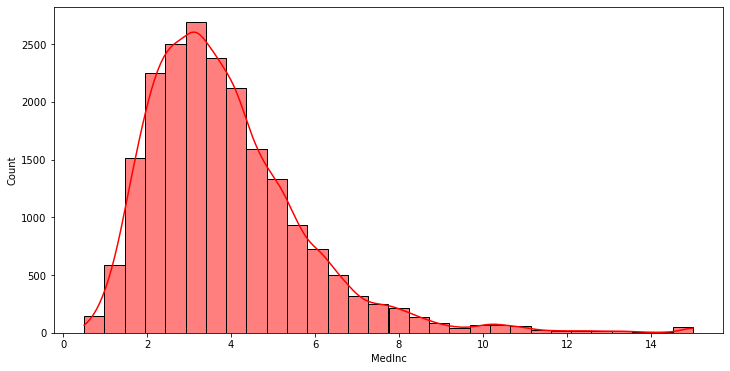

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))

sns.histplot(data['MedInc'],bins = 30, kde=True, color='red') #분포 그림

In [13]:
from scipy.stats import skew, kurtosis 

medinc_skewness = skew(data['MedInc'])
medinc_kurtosis = kurtosis(data['MedInc'])

print(medinc_skewness)
print(medinc_kurtosis)

1.64653702990008
4.951033760409659
